

```
# Isto está formatado como código
```

# Analysis of Donald Trump's Tweets
**Malo Grosso -  Andre Marinho - Ruilin Zhou - Shaghayegh Ramezanpour**

Our project was meant to identify the most recurring topics in Donald Trump's tweets, and then to analyze his speech about these topics thanks to a sentiment analysis

# 1. Initialization

First we have to import the database containing Donald Trump's tweets (until 

---

the end of June 2020) from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then we have to clean the panda dataframe to make it more convenient to use for further analysis. You can find a sample of the data frame below 

In [ ]:
# Initialization
import pandas as pd
tweets = pd.read_csv("/content/drive/Shared drives/Group 10/realdonaldtrump.csv")

# Presentation option to display the entire tweet (and not just a preview)
pd.set_option('display.max_colwidth', -1)

# Rename tweet column
cols = tweets.columns.to_list()
cols[2]="tweet"
tweets.columns = cols

# Drop useless columns (tweet id, tweet hyperlink)
tweets = tweets.drop(columns=["id"])
tweets = tweets.drop(columns=["link"])

tweets.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,tweet,date,retweets,favorites,mentions,hashtags
32899,"WORKING TOGETHER, we will defeat this # OpioidEpidemic & free our nation from the terrible affliction of drug abuse. http://45.wh.gov/OpioidCrisis pic.twitter.com/mZI5uQN4oZ",2017-10-26 20:18:55,8289,40335,NaN,#OpioidEpidemic
20580,Via @ MiamiNewTimes by @ Munzenrieder : “Doral Mayor Declares Emergency to Give Donald Trump Key to the City”http://blogs.miaminewtimes.com/riptide/2015/01/doral_declares_it_an_emergency_to_give_donald_trump_key_to_the_city.php …,2015-01-30 12:26:17,16,25,"@MiamiNewTimes,@Munzenrieder",NaN
379,Higher Taxes kill job creation---cut wild government spending and waste.,2011-07-27 10:18:01,285,149,NaN,NaN
13223,“Know from the inside out that you have the power to succeed and you will.” – Think Like a Champion,2013-12-10 14:50:17,328,248,NaN,NaN
25270,""" @ Karentalk: @ CNNPolitics @ realDonaldTrump Stop interrupting Trump..Please..He is CORRECT ON EVERYTHING..""",2015-10-06 06:31:48,336,939,"@Karentalk,@CNNPolitics,@realDonaldTrump",NaN


Number of tweets per year: Donald Trump became an active user starting 2013 and seemed more active prior both 2016 and 2020 elections

Nota: 2020 data only include tweets until June 2020

In [ ]:
# Split date column in year, month, day and time
dates = tweets["date"].str.split("-|\s", expand=True)
dates.columns = ["year","month","day","time"]
tweets = pd.concat([tweets, dates], axis=1)

# Number of tweets per year
yearcount = tweets.groupby('year').count()
yearcount["tweet"]

<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: Dep

year
2009    56  
2010    143 
2011    869 
2012    4193
2013    8203
2014    6001
2015    7707
2016    3945
2017    2231
2018    3001
2019    4590
2020    2413
Name: tweet, dtype: int64

Number of tweets per year: Donald Trump became an active user starting 2013 and seemed more active prior both 2016 and 2020 elections

Nota: 2020 data only include tweets until June 2020



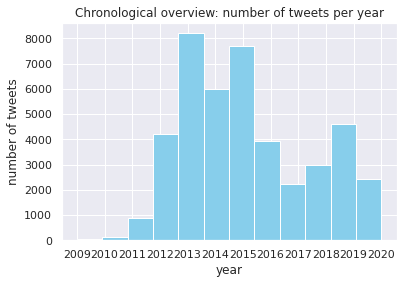

In [ ]:
#Chronological overview: number of tweets per year
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
tweets = tweets.sort_values(by="year")
yearPlot=tweets["year"]
plt1.hist(yearPlot, bins=12,color = "skyblue")
plt.title('Chronological overview: number of tweets per year')
plt.xlabel('year')
plt.ylabel('number of tweets')
plt1.show()

The number of tweets per month is quite constant with a little rise in January and September

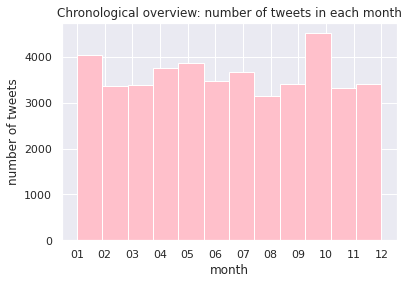

In [ ]:
#Chronological overview: number of tweets in each month
import matplotlib.pyplot as plt2
tweets = tweets.sort_values(by="month")
monthPlot=tweets["month"]
plt2.hist(monthPlot, bins=12, color = "pink")
plt.title('Chronological overview: number of tweets in each month')
plt.xlabel('month')
plt.ylabel('number of tweets')
plt2.show()

Donald Trump seems more active early in the morning and early in the afternoon. As the man seems like he never stops tweeting while he is awake, we might guess that Donald Trump usually goes to bed at midnight and get up at 6AM.

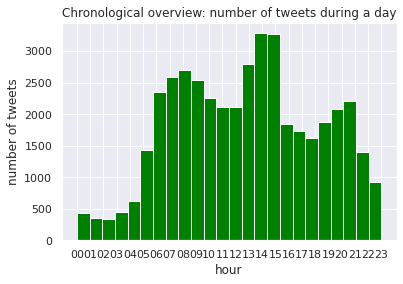

In [ ]:
# Split time column and show the hour
times = tweets["time"].str.split(":", expand=True)
times.columns = ["hour","minute","second"]
tweets = pd.concat([tweets, times], axis=1)

#Chronological overview: number of tweets during a day
import matplotlib.pyplot as plt3
tweets = tweets.sort_values(by="hour")
hourPlot=tweets["hour"]
plt3.hist(hourPlot, bins=24,color = "green")
plt3.title('Chronological overview: number of tweets during a day')
plt3.xlabel('hour')
plt3.ylabel('number of tweets')
plt3.show()

Donald Trump clearly gained popularity on Twitter starting 2016; the number of retweets and likes keeps rising from that year

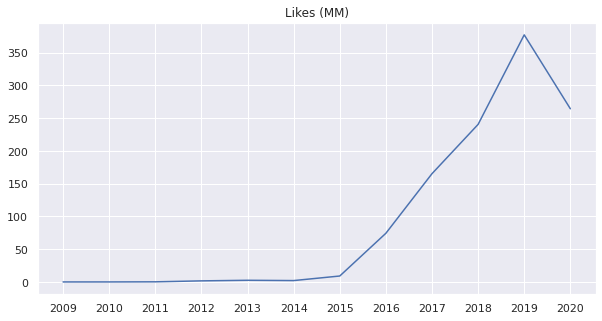

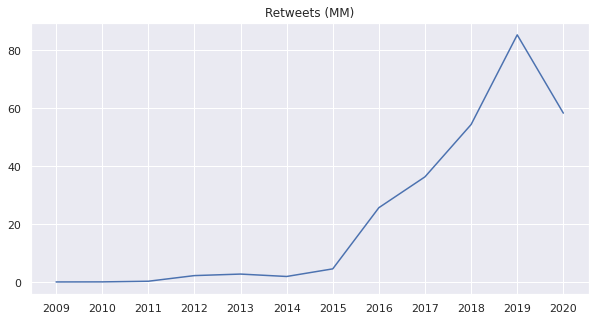

In [ ]:
# Exploratory Data Analysis (EDA)

# Data Visualization Lib
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

tweetsGb = tweets.groupby(['year']).sum()
tweetsGb.head()

# Trump's Popularity

# Likes over time 

plt.figure(figsize = (10 , 5))
plt.title('Likes (MM)')
plt.plot(tweetsGb.index, tweetsGb.favorites / 10**6)
plt.show()

# Retweets over time

plt.figure(figsize = (10 , 5))
plt.title('Retweets (MM)')
plt.plot(tweetsGb.index, tweetsGb.retweets / 10**6)
plt.show()

We are now also able to have a quick look at the tweets mentionning one specific topic:

In [ ]:
# To get all the tweets about a specific topic using Pandas, input your topic as well as related keywords as done in the example below
searchBiden = ['@JoeBiden','@VPBiden','Biden', 'Joe Biden', 'Sleepy Joe','biden','joe biden','sleepy joe','crazy joe','Crazy Joe']

# Then get a dataframe including all the tweets mentionning the listed keywords
JoeBiden = tweets[tweets['tweet'].str.contains('|'.join(searchBiden))]

JoeBiden.sample(5)

# More examples below:

#searchHillary = ['Hillary Clinton','Clinton','Hillary','@HillaryClinton']
#Hillary = tweets[tweets['tweet'].str.contains('|'.join(searchHillary))]

#searchCovid = ['covid','virus','coronavirus','pandemic','covid-19']
#Covid = tweets[tweets['tweet'].str.contains('|'.join(searchCovid))]

,tweet,date,retweets,favorites,mentions,hashtags,year,month,day,time,hour,minute,second
3040,Even the SEALS who killed Bin Laden don't like @ JoeBidenhttp://bit.ly/NWE5aa,2012-08-30 08:36:56,254,159,@JoeBidenhttp,NaN,2012,08,30,08:36:56,08,36,56
39312,"....story about me and a perfectly fine and routine conversation I had with the new President of the Ukraine. Nothing was said that was in any way wrong, but Biden’s demand, on the other hand, was a complete and total disaster. The Fake News knows this but doesn’t want to report!",2019-09-21 07:31:36,14530,59868,NaN,NaN,2019,09,21,07:31:36,07,31,36
42236,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!",2020-04-11 17:35:35,16757,72210,NaN,NaN,2020,04,11,17:35:35,17,35,35
39325,"“Ukraine Foreign Minister disputes reports of any pressure from Trump. This conversation was long, friendly, and it touched on many questions.” @ NBCNews Correct. If your looking for something done wrong, just look at the tape of Sleepy Joe. He is being protected by the Media!",2019-09-21 17:47:22,15420,55359,@NBCNews,NaN,2019,09,21,17:47:22,17,47,22
41599,"Looks like Crazy Bernie is doing well in the Great State of Nevada. Biden & the rest look weak, & no way Mini Mike can restart his campaign after the worst debate performance in the history of Presidential Debates. Congratulations Bernie, & don’t let them take it away from you!",2020-02-22 17:55:36,24456,124696,NaN,NaN,2020,02,22,17:55:36,17,55,36


# 2. Identifying the most discussed topics


**Text processing**

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

**Common data cleaning steps on all text:**

*  Make text all lower case
*  Remove punctuation
*  Remove numerical values
*  Remove common non-sensical text (/n)
*  Tokenize text
*  Remove stop words
*  Stemming / lemmatization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

! pip install textblob
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

tweets.tweet.head(5)

16358    " @ KaelaDianne97: The only way to fix our country's mess is @ realDonaldTrump for president in 2016! HE IS THE SMARTEST AND MOST CAPABLE MAN!
21390    "@anon_thom: You have my vote @ realDonaldTrump"                                                                                              
24088    Wow, new @ ABCnews/ @ WashingtonPost @ GOP preference poll has DonaldTrump 11 points up! Thank you.                                           
13702    " @ JLsmoothh: @ realDonaldTrump run for president please"                                                                                    
13701    " @ ALLEN1328: @ realDonaldTrump Next president of the U.S.                                                                                   
Name: tweet, dtype: object

In [ ]:
# Lower casing
tweets['tweet'] = tweets['tweet'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

# Removing punctuations
tweets['tweet'] = tweets['tweet'].str.replace('[^\w\s]', "")
tweets.tweet.head(5)

<input>:6: DeprecationWarning: invalid escape sequence \w
<input>:6: DeprecationWarning: invalid escape sequence \w
<input>:6: DeprecationWarning: invalid escape sequence \w
<input>:6: DeprecationWarning: invalid escape sequence \w
<input>:6: DeprecationWarning: invalid escape sequence \w
<input>:6: DeprecationWarning: invalid escape sequence \w
<ipython-input-27-108144d80410>:6: DeprecationWarning: invalid escape sequence \w
  tweets['tweet'] = tweets['tweet'].str.replace('[^\w\s]', "")


16358      kaeladianne97 the only way to fix our countrys mess is  realdonaldtrump for president in 2016 he is the smartest and most capable man
21390    anon_thom you have my vote  realdonaldtrump                                                                                            
24088    wow new  abcnews  washingtonpost  gop preference poll has donaldtrump 11 points up thank you                                           
13702      jlsmoothh  realdonaldtrump run for president please                                                                                  
13701      allen1328  realdonaldtrump next president of the us                                                                                  
Name: tweet, dtype: object

In [ ]:
# Removing the stopwords
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
tweets['tweet'] = tweets['tweet'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
tweets.tweet.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


16358    kaeladianne97 way fix countrys mess realdonaldtrump president 2016 smartest capable man
21390    anon_thom vote realdonaldtrump                                                         
24088    wow new abcnews washingtonpost gop preference poll donaldtrump 11 points thank         
13702    jlsmoothh realdonaldtrump run president please                                         
13701    allen1328 realdonaldtrump next president us                                            
Name: tweet, dtype: object

In [ ]:
# Lemmatization
import nltk
nltk.download('wordnet')

tweets['tweet']  = tweets['tweet'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweets.tweet.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


16358    kaeladianne97 way fix country mess realdonaldtrump president 2016 smartest capable man
21390    anon_thom vote realdonaldtrump                                                        
24088    wow new abcnews washingtonpost gop preference poll donaldtrump 11 point thank         
13702    jlsmoothh realdonaldtrump run president please                                        
13701    allen1328 realdonaldtrump next president u                                            
Name: tweet, dtype: object

**Word Clouds**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2015


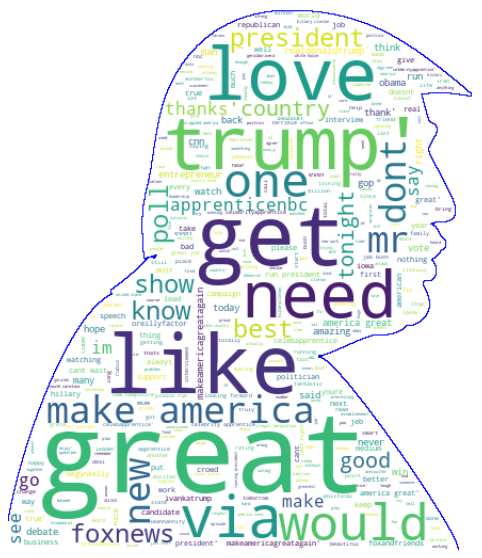

2016


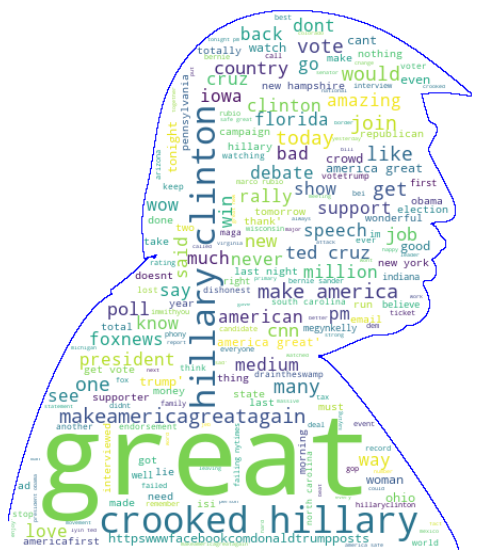

2017


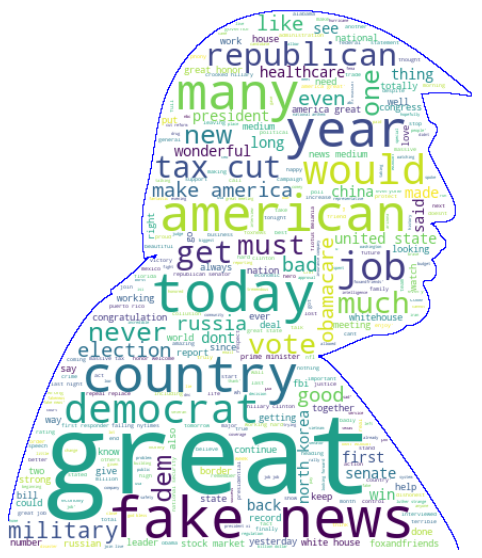

2018


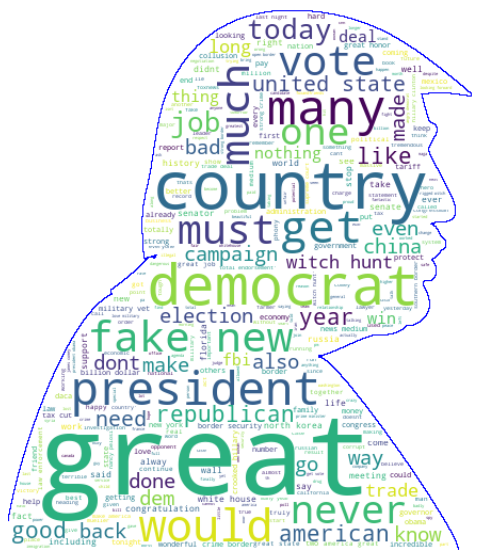

2019


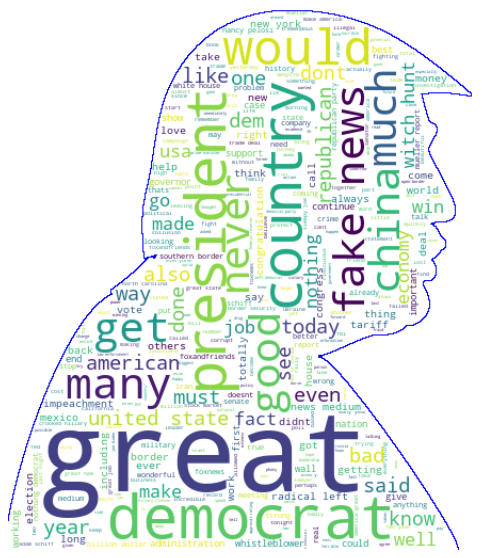

2020


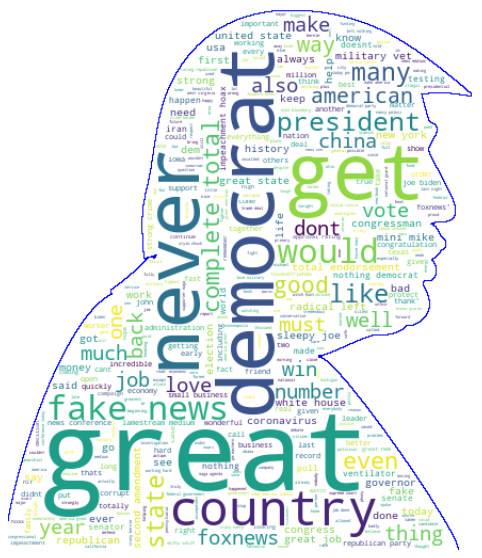

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import re
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopWords = nltk.corpus.stopwords.words('english')
customStopWords = ['twitter', 'realdonaldtrump', 'tweet', 'trump', 'pic', 'will', 'thank', 
                   "http","https","www","bit","ly","twitter","pic","com",
                   "realdonaldtrump","donaldtrump","donald","trump","don",
                   "thank", "you","big","status","day","time","want","story","soon","really","just","thanks","let","going","far","look","yes","people","does","doesn","did","didn"]
stopWords.extend(customStopWords)


tweets2015 = tweets[tweets['year'] == '2015']
tweets2016 = tweets[tweets['year'] == '2016'] 
tweets2017 = tweets[tweets['year'] == '2017'] 
tweets2018 = tweets[tweets['year'] == '2018'] 
tweets2019 = tweets[tweets['year'] == '2019'] 
tweets2020 = tweets[tweets['year'] == '2020'] 


  
years = [tweets2015['tweet'], tweets2016['tweet'], tweets2017['tweet'], tweets2018['tweet'], tweets2019['tweet'], tweets2020['tweet']]


def wordCloudPerYear():
  yearsCount = 0
  for y in years:
   teste = []
   print(2015 + yearsCount)
                 
   #Exclude Numbers
   y = y.map(lambda x: re.sub('\\d', '', x))   
   y = y.map(lambda x: re.sub('\\w*\\d\\w*', '', x))
   
   # Exclude Stopwords   
   for i in y:
      word_tokenize(i)
      teste.append(i)
          
   # Generate Wordcloud
   custom_mask = np.array(Image.open('/content/drive/Shareddrives/Group 10/1_ALByHE3fv8xNfD1eTx12XQ.png'))
   wordcloud = WordCloud().generate(str(teste))
   wordcloud = WordCloud(width = 950, height = 520, max_words = 500, stopwords = stopWords, background_color="white", max_font_size = 300, mask = custom_mask, contour_width = 1, contour_color = 'blue').generate(str(teste))
   plt.figure(figsize = (20, 10))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()
   yearsCount += 1
   

wordCloudPerYear()

**Identification of the most discussed topics with SkLearn**

The first step is about getting a list of topics mentionned in the tweets and analyze the most recurrent ones. 

We will only focus on part of the tweets (like the tweets from a specific year) for more accurate results (2019 in the example). Analyzing all the tweets does not provide relevant results.

In [ ]:
# The first step is about word vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
n_features = 1000
from sklearn.feature_extraction import text

# Eliminate words that are useless for the analysis by using the English stop words dictionnary and adding customized keywords

my_additional_stop_words = ["http","https","www","bit","ly","twitter","pic","com",
                            "realdonaldtrump","donald","trump","don","trumpchicago",
                            "you","big","status","day","time","story","soon","really","just","thanks",
                            "far","yes","people","thing","tweet","mr",
                            "thank","want","think","said","let","going","look","watching","watch","turn",
                            "feel","say","tell","use","wait","saying","make","come","making","coming",
                            "didnt","did","doesnt","doesn","does","dont","im","youre",
                            "celebapprentice","celebrityapprentice","apprentice","theapprentice","apprenticenbc","celebrity"]
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words = stop_words)

tf = tf_vectorizer.fit_transform(tweets2019.tweet)

# Then the idea is to identify topics from the tweets with LatentDirichletAllocation
from sklearn.decomposition import LatentDirichletAllocation
n_components = int(input("How many topics do you want to define?\n"))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=50,
                                learning_method='batch',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx) 
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
n_top_words = int(input("How many words per topic do you want to display?\n"))

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

How many topics do you want to define?
30
How many words per topic do you want to display?
10
Topic #0:
party republican democrat rating cnn point foxandfriends approval poll msnbc
Topic #1:
working hard leader city work california problem care government bad
Topic #2:
news fake medium corrupt true bad post reporting fact source
Topic #3:
border democrat security mexico southern immigration drug open law country
Topic #4:
presidential beautiful important future crowd maga office harassment successful massive
Topic #5:
nancy pelosi president statement crazy know pro zero like word
Topic #6:
night john louisiana governor republican truly great amazing rally horrible
Topic #7:
history economy record market country greatest president stock best year
Topic #8:
job great vote military strong love vet complete republican total
Topic #9:
mueller report collusion dems fight obstruction general democrat angry attorney
Topic #10:
president administration obama right year american price good drug 

By defining 30 topics, we find that some of the most important topics mentionned in **2019** Trump's tweets are:
- The intent of the democrats to trigger an impeachment procedure against Donald Trump (bashing)
- The stock exchange recent record level
- The supposed impact of illegal immigration on jobs
- Joe Biden (bashing)
- Trade war with China
- Syria war
- The Mexican wall extension project and its supposed positive impact on drug traffic
- The FBI investigation against "crooked" Hillary Clinton in the "email affair"
- Kim Jong Un and North Korea
- Etc.   

**Intertopic Distance Map (via multidimensional scaling)**

The graph provides a global view of the topics (and how they differ from each other), while at the same time allowing for a deep inspection of the terms most highly associated with each individual topic.

The left panel is the divergence between topics:the closer the circle, the closer the topic. The area of the circle represents each topics' overall prevalence.

The right panel represent the individual terms that are the most useful for interpreting the currently selected topic on the left.A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term.

In [ ]:
!python -m pip install -U pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.6/dist-packages (2.1.2)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.089198 -0.066985  1       1        5.051297
3      0.011361  0.097818  2       1        5.038629
25     0.224805  0.077882  3       1        4.840207
24     0.177781  0.124224  4       1        4.489887
20    -0.101411 -0.133282  5       1        4.344627
18     0.154644 -0.022240  6       1        3.972789
19    -0.189037  0.065638  7       1        3.933894
8     -0.198665  0.200416  8       1        3.764668
27    -0.139162 -0.013329  9       1        3.596259
11    -0.080905 -0.220286  10      1        3.475247
26    -0.257628  0.161533  11      1        3.456712
15    -0.042579  0.083552  12      1        3.341718
7     -0.040683 -0.202479  13      1        3.297261
17    -0.052118 -0.179725  14      1        3.275528
5      0.176005 -0.028776  15      1        3.271178
0      0.119480  0.096896  16      1        3.213578
9      0.091839  0.053297  17      1        3.165798
10     0.030252 -0.145413  18      1        3.098388
12    -0.043185  0.014248  19      1        3.047556
14    -0.160343  0.016591  20      1        3.007180
21     0.045008 -0.049902  21      1        2.858722
13    -0.004950 -0.145959  22      1        2.737966
1     -0.071169 -0.009858  23      1        2.706128
22     0.064441  0.120005  24      1        2.698569
29     0.200435  0.055665  25      1        2.694513
28     0.022261 -0.043913  26      1        2.660625
6     -0.041012  0.152687  27      1        2.544423
23     0.079536  0.005451  28      1        2.291208
16    -0.012996 -0.077222  29      1        2.090428
4     -0.051202  0.013466  30      1        2.035017, topic_info=          Term        Freq       Total Category  logprob  loglift
353  great      920.000000  920.000000  Default  30.0000  30.0000
835  state      363.000000  363.000000  Default  29.0000  29.0000
596  new        321.000000  321.000000  Default  28.0000  28.0000
597  news       331.000000  331.000000  Default  27.0000  27.0000
678  president  570.000000  570.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
888  tonight    19.782861   57.355833   Topic30 -3.7570   2.8302 
656  pm         9.420575    43.877649   Topic30 -4.4989   2.3562 
567  million    11.022199   67.252134   Topic30 -4.3419   2.0861 
980  word       9.575115    59.959794   Topic30 -4.4827   2.0602 
8    2020       9.763593    84.713586   Topic30 -4.4632   1.7341 

[1194 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0     14     0.818960  10  
0     16     0.144522  10  
1     6      0.070964  100 
1     8      0.189238  100 
1     14     0.520403  100 
...  ..           ...  ... 
999   4      0.092911  zero
999   15     0.520304  zero
999   18     0.055747  zero
999   21     0.074329  zero
999   28     0.055747  zero

[2875 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 26, 25, 21, 19, 20, 9, 28, 12, 27, 16, 8, 18, 6, 1, 10, 11, 13, 15, 22, 14, 2, 23, 30, 29, 7, 24, 17, 5])

**Tweets classification with transformers classifier**

The classifier is meant to categorize a text, so that we can analyze whether it is about economics, politics or about any priorly defined category.

In [ ]:
# First import the transformers classifier, pipeline
!pip install transformers
from transformers import pipeline

     |████████████████████████████████| 1.3MB 4.2MB/s 
     |████████████████████████████████| 890kB 31.5MB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 2.9MB 45.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=96f89873c4e0acfe75dece975f3c66446ff462c30e63324644bf90cf04b6a33d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Let's take an example with one tweet; of course it is not accurate to analyze the context as the following example shows it. The classifier identifies "Joe Biden" as the main topic but does not make any link with the "presidential campaign" or "politics".

In [ ]:
# Call the zero-shot-classification
classifier = pipeline("zero-shot-classification")

# Define the sequence (text) that you want to analyze
sequence = tweets.tweet[33808]

# Define the categories
labels = ["Joe Biden", "politics", "presidential campaign"]

classifier(sequence, labels)

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartModel: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'labels': ['Joe Biden', 'presidential campaign', 'politics'],
 'scores': [0.9965471625328064, 0.0020011411979794502, 0.0014517039526253939],
 'sequence': 'crazy joe biden trying act like tough guy actually weak mentally physically yet threatens second time physical assault doesnt know would go fast hard cry way dont threaten people joe'}

We then tried to run on the classifier to see if there was a way to identify more clearly the most mentionned topics than with word clouds. Unfortunatly, it is way too long to run on more than one sequence of text…

In [ ]:
#categorization_result = {'cat 1': 0, 'cat 2': 0, 'cat 3': 0}

#i = 0

#labels = ["Economics","Immigration","Environment"]

#while i < len(JoeBiden) :
#    categorization_result['cat 1'] += classifier(JoeBiden[i], labels)['scores'][0]
#    categorization_result['cat 2'] += classifier(JoeBiden[i], labels)['scores'][1]
#    categorization_result['cat 3'] += classifier(JoeBiden[i], labels)['scores'][2]
#    i += 1

#categorization_result['cat 1'] = categorization_result['cat 1']/len(JoeBiden)
#categorization_result['cat 2'] = categorization_result['cat 2']/len(JoeBiden)
#categorization_result['cat 3'] = categorization_result['cat 3']/len(JoeBiden)

#categorization_result

# 3. Sentiment analysis

**Vader sentiment analyzer**
The Vader sentiment analyzer, from nltk library, allows to analyze whether a text is positive, neutral or negative and gives a compounded score of this 'positivity'.

In [ ]:
# Initialize the VADER sentiment analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Let's take an example to see the ouput we obtain with Vader for one tweet
tweetscontent = tweets['tweet'].to_list()
analyzer = SentimentIntensityAnalyzer()
print(tweetscontent[1])
analyzer.polarity_scores(tweetscontent[1])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
anon_thom vote realdonaldtrump


{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

Please type a keyword: 
Joe Biden
Please type a keyword: 
Biden
Please type a keyword: 
Sleepy Joe
Please type a keyword: 
Crazy Joe
Please type a keyword: 
stop

When considering the keywords: ['joe biden', 'biden', 'sleepy joe', 'crazy joe'], we find:
76 positive tweets 
95 negative tweets 
23 neutral tweets 
194 tweets were considered for the analysis.


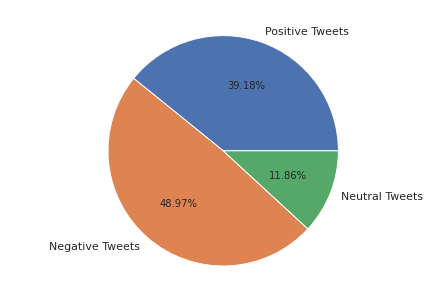

In [ ]:
# Now let's focus not only on a single tweet but on a defined topic (and related keywords):

keywords = []
keyword = input("Please type a keyword: \n").lower()

while keyword != 'stop' :
  keywords.append(keyword)
  keyword = input("Please type a keyword: \n").lower()

search = tweets[tweets['tweet'].str.contains('|'.join(keywords))]
search = search['tweet'].to_list()

result = {'pos': 0, 'neg': 0, 'neu': 0}
i = 0
while i < len(search) :
    score = analyzer.polarity_scores(search[i])
    i += 1
    if score['compound'] > 0.05:
        result['pos'] += 1
    elif score['compound'] < -0.05:
        result['neg'] += 1
    else:
       result['neu'] += 1

print(f"\nWhen considering the keywords: {keywords}, we find:\n{result['pos']} positive tweets \n{result['neg']} negative tweets \n{result['neu']} neutral tweets \n{len(search)} tweets were considered for the analysis.")

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
names = ['Positive Tweets', 'Negative Tweets', 'Neutral Tweets']
values = [result['pos'], result['neg'], result['neu']]
ax.pie(values, labels = names, autopct='%1.2f%%')
plt.show()

**Sentiment analysis with TextBlob**

In [ ]:
# Initialization
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Let's take an example with a single sequence
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

It is interesting to see that results differ from Vader analysis. However, it must be mentionned that sentiment analysis with Textblob's NaiveBayesAnalyzer takes much more time and is thus not easy to apply on a high number of tweets.


When considering the keywords: ['joe biden', 'biden', 'sleepy joe', 'crazy joe'], we find:
137 positive tweets 
57 negative tweets 
194 tweets were considered for the analysis.


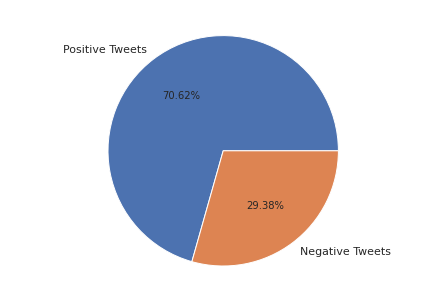

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

result = {'pos': 0, 'neg': 0}
i = 0
while i < len(search) :
    blob = TextBlob(search[i], analyzer=NaiveBayesAnalyzer())
    analysis = getattr(blob.sentiment, 'classification')
    i += 1
    if analysis == 'pos':
       result['pos'] += 1
    else:
       result['neg'] += 1

print(f"\nWhen considering the keywords: {keywords}, we find:\n{result['pos']} positive tweets \n{result['neg']} negative tweets \n{len(search)} tweets were considered for the analysis.")
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
names = ['Positive Tweets', 'Negative Tweets']
values = [result['pos'], result['neg']]
ax.pie(values, labels = names, autopct='%1.2f%%')
plt.show()

**Polarity and Subjectivity**

The number of positive and negative tweets are nearly equal to each other and 43% of them are just based on his own opinion and not the facts.

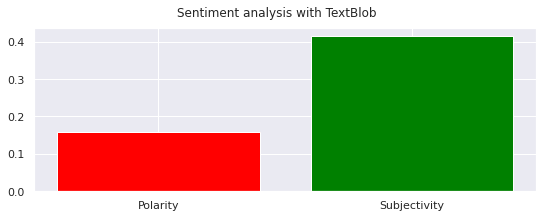

In [ ]:
import textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets['polarity'] = tweets['tweet'].apply(pol)
tweets['subjectivity'] = tweets['tweet'].apply(sub)

totalPolarity=sum(tweets['polarity'])/len(tweets)
totalSubjectivity=sum(tweets['subjectivity'])/len(tweets)
names = ['Polarity', 'Subjectivity']
values = [totalPolarity, totalSubjectivity]
plt.figure(figsize=(9, 3))
plt.bar(names, values,color=['red', 'green'])
plt.suptitle('Sentiment analysis with TextBlob')
plt.show()

# 4. What's gonna be Donald Trump's next tweet

In [ ]:
!pip install transformers
from transformers import pipeline
generator = pipeline('text-generation',
                     model='huggingtweets/realdonaldtrump')
generator("Joe Biden is", num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Joe Biden is a corrupt politician, and it is his responsibility to expose it. His actions on Wall St. are a major scandal that should not be allowed to fester, in public view. The real reason this scandal began is because he is a corrupt politician who never got around to telling the truth. If I were Biden, I would be running for President.”'},
 {'generated_text': 'Joe Biden is not a strong advocate for women. He wants to confiscate your guns. Why would we allow him to do this? He will impose taxes and regulations that put his political power in the hands of his cronies, such as @LouDobbs’s. Joe wants to shut down our Country while he shreds your Second Amendment. Biden has done more for our Brave Brave Law Enforcement than any other Democrat in the Country. Biden’s Anti-American agenda is not sustainable. #VOTE'},
 {'generated_text': 'Joe Biden is making a big deal about China, despite all the negative and inaccurate reporting by so many. They say he has NO busine